In [42]:
from glob import glob
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import pandas as pd

# statistics
from astropy.stats import biweight_location, biweight_scale, sigma_clipped_stats
from scipy.stats import median_abs_deviation

# configuration
np.set_printoptions(linewidth=120) # para que se vea
plt.rcParams["image.cmap"] = "plasma" # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

# M-92, imágenes desde KPNO 

Para cada parte del ejercicio, agregue tantas celdas de código o de Markdown como considere necesario.

## 1) Información

Obtenga el tipo de imagen, el objeto, y después el filtro de cada una de las imágenes en la carpeta `data/m92`.

Organice esta información como crea conveniente, ya sea en diferentes variables, en diccionarios, o en un DataFrame.

¿Por qué el bias no tiene filtro asignado?

In [2]:
glob("*")

['ccd.ipynb', 'data']

In [3]:
files_m92 = glob("data/m92/*.fit")
files_m92

['data/m92\\m92_1.fit',
 'data/m92\\m92_2.fit',
 'data/m92\\m92_3.fit',
 'data/m92\\m92_4.fit',
 'data/m92\\m92_5.fit',
 'data/m92\\m92_6.fit',
 'data/m92\\m92_7.fit']

In [4]:
for file in files_m92:
    print(fits.info(file))

Filename: data/m92\m92_1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_2.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_3.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_4.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_5.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_6.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_7.fit
No.    Name

In [20]:
headers = [fits.getheader(f) for f in files_m92]
headers
for i in range(0,7):
    print(headers[i]["OBJECT"])
    #print(headers[i]['NAXIS2'])

ave of 25 bias
ave of  5 Harris B Sept 1 1987
ave of  5 V filter dome flat  1-sept-87
M-92 V
M-92 V
M-92 B
M-92 B


In [16]:
headers

[SIMPLE  =                    T  /  FITS STANDARD                                
 BITPIX  =                   16  /  FITS BITS/PIXEL                              
 NAXIS   =                    2  /  NUMBER OF AXES                               
 NAXIS1  =                  352  /                                               
 NAXIS2  =                  512  /                                               
 BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
 BZERO   =       0.0000000000E0  /                                               
 OBJECT  = 'ave of 25 bias'      /                                               
 ORIGIN  = 'KPNO-IRAF'           /                                               
 DATE    = '17-09-93'            /                                               
 IRAFNAME= 'm92001.imh'          /  NAME OF IRAF IMAGE FILE                      
 IRAF-MAX=           7.130000E2  /  DATA MAX                                     
 IRAF-MIN=      

## 2) Visualización

Importe todas las imágenes con `fits.getdata`. Organice estas imágenes como considere necesario, siguendo el mismo esquema que usó en el primer punto.

Haga un subplot para visualizar todas las imágenes. Puede usar la función `quantile_imshow` que usamos para el primer laboratorio.

In [8]:
images = [fits.getdata(f) for f in files_m92]

In [9]:
title_images = {
    '0': 'Bias',
    "1":"Flat B",
    "2":"Flat V",
    "3":"V1",
    "4":"V2",
    "5":"B1",
    "6":"B2"
    }

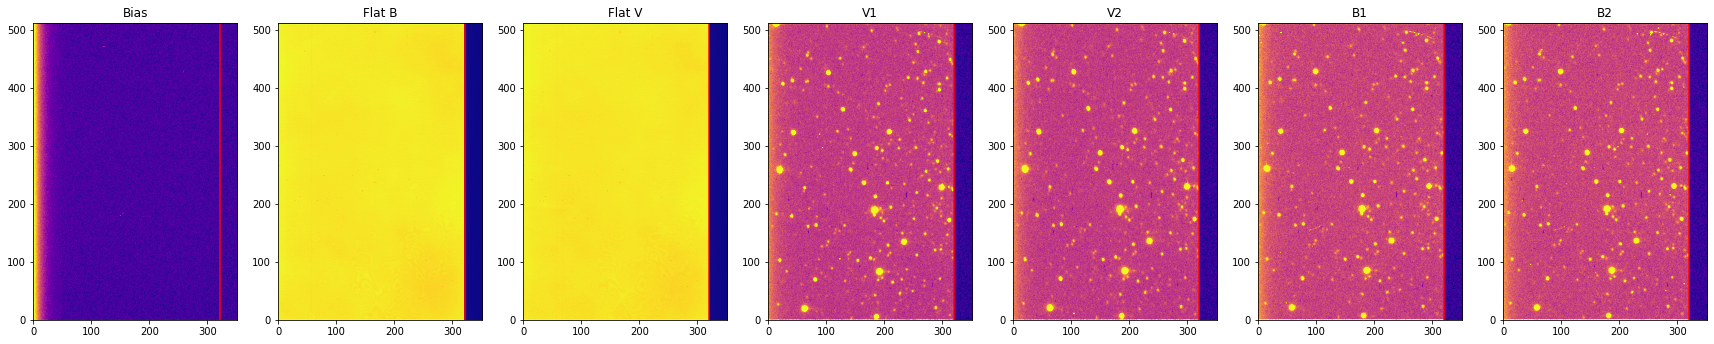

In [51]:
fig,ax = plt.subplots(ncols=7,figsize=(30,10))
for i in range(7):
    plt.sca(ax[i])
    quantile_imshow(images[i])
    plt.axvline(321.0, color ='red')
    plt.title(str(title_images[str(i)]))

#Usé la herramienta plt.axvline para encontrar el punto donde empieza la zona del overscan

## 3) Recorte

Estas imágenes tienen algo llamado _"overscan"_. Discuta brevemente qué entiende de este término, según la explicación del profesor.

Overscan: porción de un CCD que no está expuesta a la luz.

### 3.A) detalle del overscan

Grafique el promedio de los pixeles en X (`np.mean(...,axis=0)`) contra los pixeles en Y (`NAXIS1`).
Haga un zoom de su gráfica de promedio a la región de overscan. Para esto puede usar `plt.xlim` y `plt.ylim`.

Determine la región de overscan: píxel inicial y pixel final. Guarde esta información como lo considere conveniente.

Obtenga estadísticas (localización y escala) de las regiones de overscan de al menos dos de las imágenes. 
¿Qué medida de localización y de escala va a usar, y por qué?

In [44]:
sum_y = [image.sum(axis=0) for image in images]
sum_x = [image.sum(axis=1) for image in images]

array([271168, 269130, 268376, 267569, 266707, 265859, 265166, 264469, 263718, 263094, 262504, 262085, 261563, 261100,
       260729, 260374, 260037, 259708, 259411, 259184, 258922, 258702, 258427, 258305, 258114, 257946, 257774, 257657,
       257487, 257382, 257272, 257187, 257137, 256974, 256934, 256861, 256776, 256761, 256678, 256599, 256584, 256508,
       256482, 256469, 256432, 256373, 256343, 256408, 256312, 256310, 256197, 256274, 256162, 256188, 256213, 256180,
       256171, 256144, 256122, 256112, 256129, 256098, 256137, 256074, 256102, 256102, 256127, 256082, 256105, 256085,
       256046, 256085, 256045, 256051, 256100, 256010, 256097, 256014, 256085, 256014, 256016, 256050, 256016, 256041,
       256090, 256035, 256118, 256079, 256032, 256023, 256072, 256061, 256055, 256033, 256002, 255989, 256064, 256005,
       256010, 256077, 255981, 256051, 256036, 256008, 256011, 256057, 256039, 256055, 256027, 256030, 256030, 256019,
       256059, 256014, 256040, 256065, 256048, 2

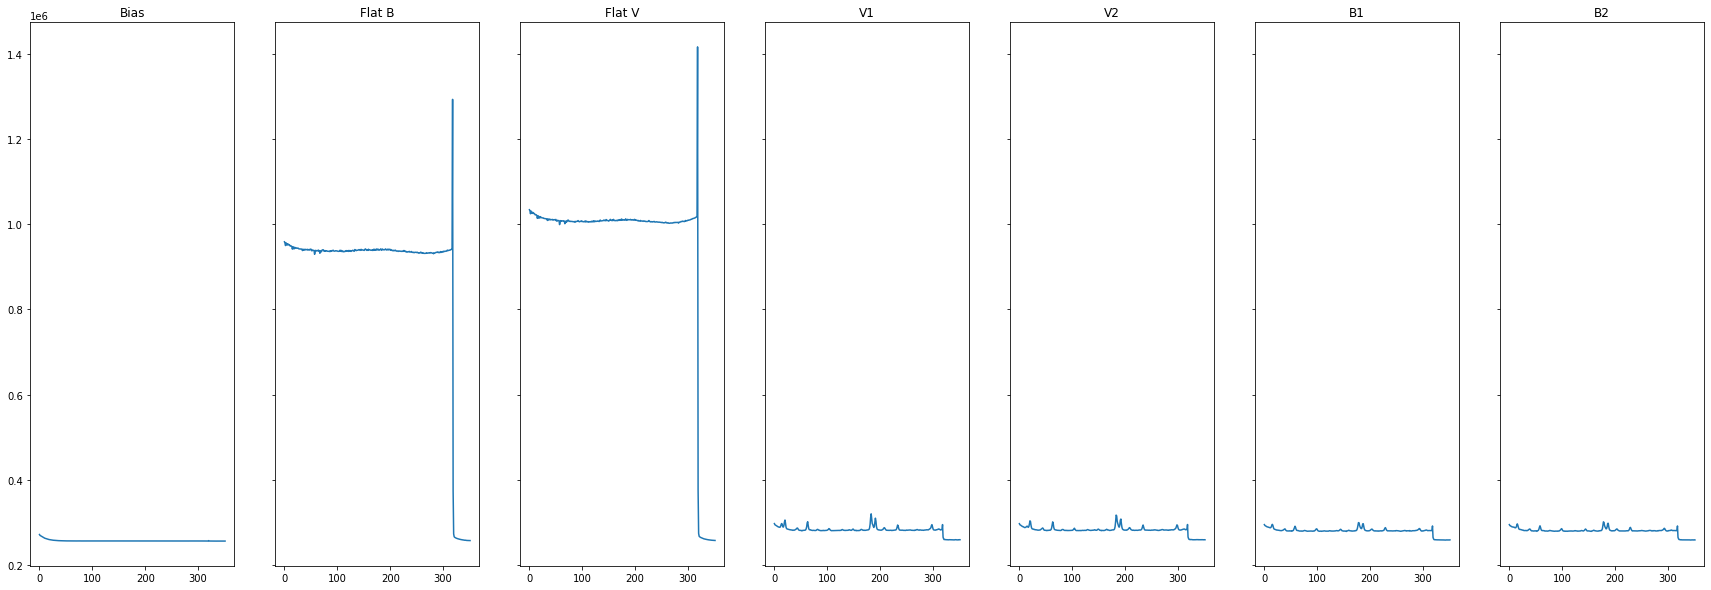

In [48]:
fig,ax = plt.subplots(ncols=7,figsize=(30,10),sharey=True)
for i in range(7):
    plt.sca(ax[i])
    plt.plot(sum_y[i])
    
    plt.title(str(title_images[str(i)]))

In [32]:
promedio_x = [np.mean(image, axis=0) for image in images]
#promedio_x
for j in range(7):
    means = np.mean(images[i], axis=0)
    print(means)

[575.15039062 570.64453125 569.85351562 567.7421875  566.7421875  564.85742188 564.2578125  564.13671875 563.57421875
 563.4921875  561.36328125 560.75       560.5703125  564.08007812 571.19335938 578.48242188 573.10742188 563.
 555.65234375 553.546875   552.8359375  552.88671875 552.02929688 550.796875   550.21289062 549.75585938 549.93945312
 548.32617188 547.75390625 547.828125   547.53320312 548.13867188 547.25195312 548.078125   547.57617188 548.84375
 551.0859375  552.72851562 554.54296875 554.86523438 551.2421875  548.32226562 546.6640625  546.17578125 546.64257812
 545.95117188 545.51757812 546.03515625 546.4375     545.90039062 546.63085938 546.41015625 544.33007812 546.02148438
 547.38867188 549.20898438 554.546875   563.6015625  569.62890625 562.49023438 553.20898438 548.87109375 547.703125
 547.87304688 547.44335938 547.59570312 547.08203125 545.6640625  545.84960938 545.46289062 545.66992188 545.87695312
 545.25585938 545.40429688 546.35351562 546.38476562 548.03515625 548

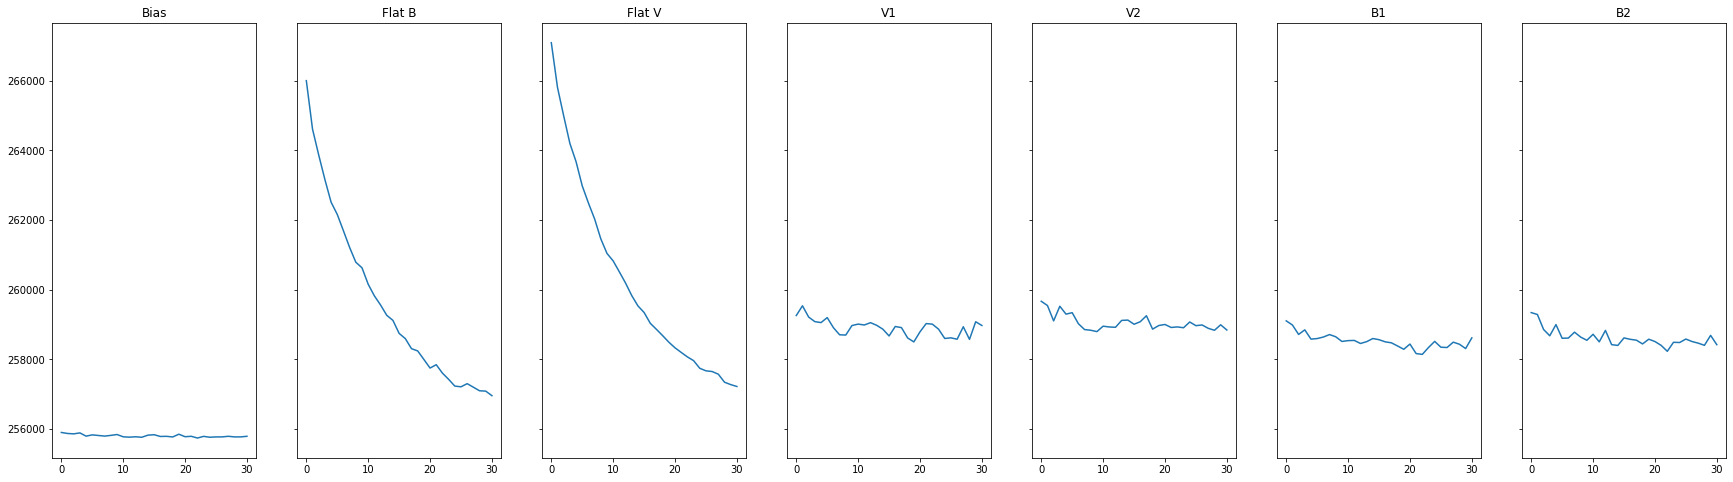

In [54]:
fig,ax = plt.subplots(ncols=7,figsize=(30,8),sharey=True)
for j in range(7):
    plt.sca(ax[j])
    plt.plot(sum_y[j][321:])
    plt.title(str(title_images[str(j)]))

In [59]:
for i in range(7):
    print("Imagen " + str(i)+': ' + str(title_images[str(i)]))
    print('Promedio = ' + str(sum_y[i][321:].mean()))


Imagen 0: Bias
Promedio = 255799.2258064516
Imagen 1: Flat B
Promedio = 259585.2258064516
Imagen 2: Flat V
Promedio = 260197.1935483871
Imagen 3: V1
Promedio = 258908.87096774194
Imagen 4: V2
Promedio = 259049.0
Imagen 5: B1
Promedio = 258525.70967741936
Imagen 6: B2
Promedio = 258616.87096774194


In [85]:
"""for i in range(0,7):
    y = headers[i]["NAXIS1"]
plt.plot(means, y)"""

'for i in range(0,7):\n    y = headers[i]["NAXIS1"]\nplt.plot(means, y)'

### 3.B) imágenes recortadas

Remueva la región de overscan (determinada en el punto anterior) de todas las imágenes. No las modifique, sino que haga copias y guarde las imágenes recortadas como considere.

In [110]:
#Overscan va desde el pixel 321 en x hasta el borde
cut=[]
for i in range (1,3):
    lista_sum_y = list(sum_y[i])
    max_intensity=max(lista_sum_y)
    indices = lista_sum_y.index(max_intensity)
    cut.append(indices) 

IndexError: index 4 is out of bounds for axis 0 with size 4

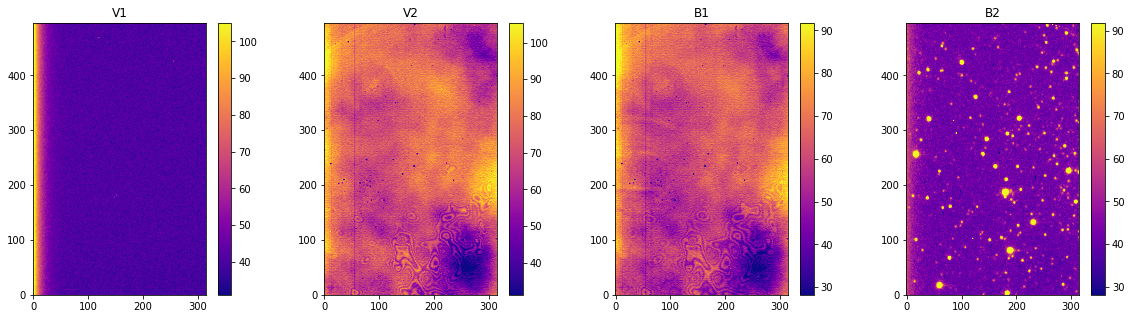

In [112]:
img_cut=[]
for i in range(7):
    img_no_overscan = (images[i][2:498, 2:cut[0]-1])
    img_cut.append(img_no_overscan)
for i in range(7):  
    plt.sca(ax[i])
    quantile_imshow(img_cut[i])

## 4) Bias

Remueva la imagen de bias de todas las imágenes, sean flat o ciencia. De nuevo, no las modifique, haga copias, y organice como considere.

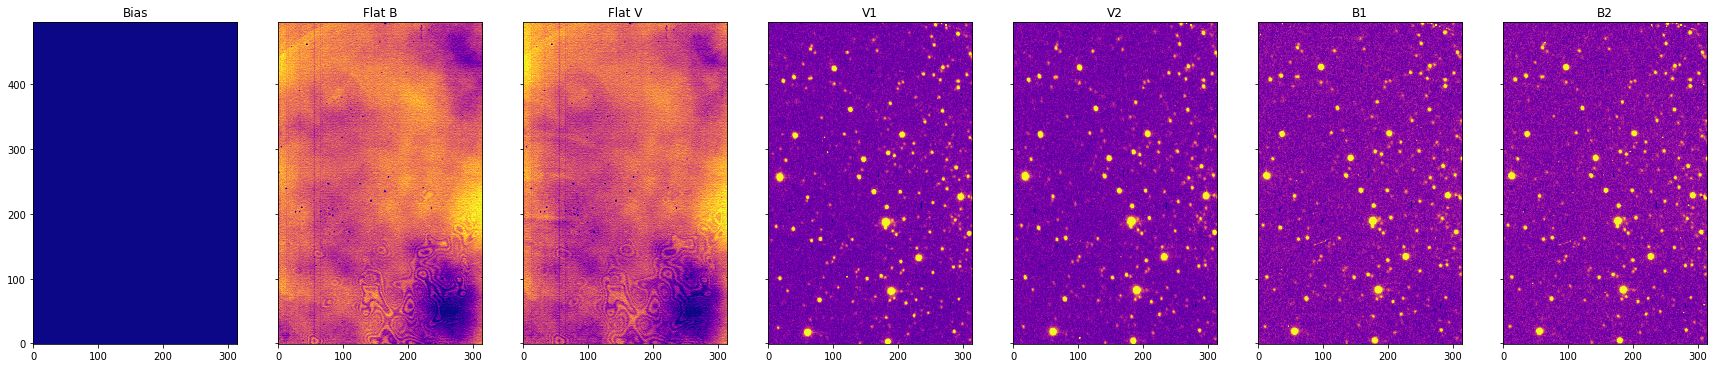

In [68]:
#restarle el bias a todas las demás imágenes
#img_cut[0] corresponde a la imagen bias
img_no_bias=[]
for i in range(0,7):
    no_bias=img_cut[i]-img_cut[0]
    img_no_bias.append(no_bias)
    plt.sca(ax[i])
    quantile_imshow(no_bias)

In [70]:
for i in range(0,7):
    print("Imagen " + str(i)+': ' + str(title_images[str(i)]))
    print('Promedio anterior = ' + str(sum_y[i][321:].mean()))
    print('Promedio nuevo = ' + str(img_cut[i].mean()-img_no_bias[i].mean()))



Imagen 0: Bias
Promedio anterior = 255799.2258064516
Promedio nuevo = 500.9894841269841
Imagen 1: Flat B
Promedio anterior = 259585.2258064516
Promedio nuevo = 500.9894841269843
Imagen 2: Flat V
Promedio anterior = 260197.1935483871
Promedio nuevo = 500.98948412698405
Imagen 3: V1
Promedio anterior = 258908.87096774194
Promedio nuevo = 500.9894841269841
Imagen 4: V2
Promedio anterior = 259049.0
Promedio nuevo = 500.9894841269841
Imagen 5: B1
Promedio anterior = 258525.70967741936
Promedio nuevo = 500.98948412698417
Imagen 6: B2
Promedio anterior = 258616.87096774194
Promedio nuevo = 500.98948412698417


### 4.extra) comparación con el overscan

Compare los valores del bias con las estádisticas que obtuvo del overscan, y comente.

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        8.0000e+00, 3.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00, 7.0000e+00,
        4.0000e+00, 1.1000e+01, 1.7000e+01, 3.0000e+01, 4.3000e+01, 9.20

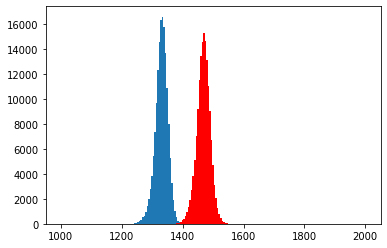

In [73]:
plt.hist(img_no_bias[1].ravel(), np.linspace(1000, 2000, 200))
plt.hist(img_no_bias[2].ravel(), np.linspace(1000, 2000, 200), color='red')

(array([2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 7.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00, 7.0000e+00, 4.0000e+00, 7.0000e+00, 9.0000e+00, 1.7000e+01,
        2.5000e+01, 3.5000e+01, 5.3000e+01, 1.0600e+02, 1.6400e+02, 2.1800e+02, 3.1500e+02, 3.6500e+02, 5.7700e+02,
        8.0300e+02, 1.0120e+03, 1.4010e+03, 1.7370e+03, 2.4430e+03, 4.0690e+03, 4.2430e+03, 5.4820e+03, 6.8240e+03,
        8.2120e+03, 9.7800e+03, 1.0874e+04, 1.1597e+04, 1.2238e+04, 1.2074e+04, 1.1379e+04, 1.0396e+04, 9.0880e+03,
        7.6450e+03, 6.2850e+03, 4.9020e+03, 3.6420e+03, 2.6010e+03, 1.8500e+03, 1.2700e+03, 8.5700e+02, 6.0000e+02,
        3.9900e+02, 2.7000e+02, 1.3600e+02, 8.1000e+01, 5.0000e+01, 1.9000e+01, 1.4000e+01, 8.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

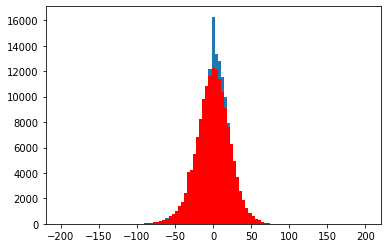

In [75]:
normal_img=img_no_bias[1].ravel()-img_no_bias[1].ravel().mean()
normal_img2=img_no_bias[2].ravel()-img_no_bias[2].ravel().mean()
plt.hist(normal_img, np.linspace(-200, 200, 100))
plt.hist(normal_img2, np.linspace(-200, 200, 100), color='red')

## 5) Flat

Normalice las imágenes flat (de nuevo, ¿qué medida de localización va a usar, y por qué?), y aplique el flat a las imágenes ciencia, teniendo cuidado de usar el filtro apropiado.

In [ ]:
#Ecuación a usar:
#flat = imagen sin bias/ promedio imagen sin bias
#Aplicar a V1, V2, B1 y B2

In [76]:
flatB = img_no_bias[1]/np.mean(img_no_bias[1])
flatV = img_no_bias[2]/np.mean(img_no_bias[2])

In [77]:
#Imágenes V
V1 = img_no_bias[3]/flatV
V2 = img_no_bias[4]/flatV

In [78]:
#Imágenes B
B1 = img_no_bias[5]/flatB
B2 = img_no_bias[6]/flatB

In [79]:
#Imágenes aplicando flat
imagenes_flat = [V1,V2,B1,B2]

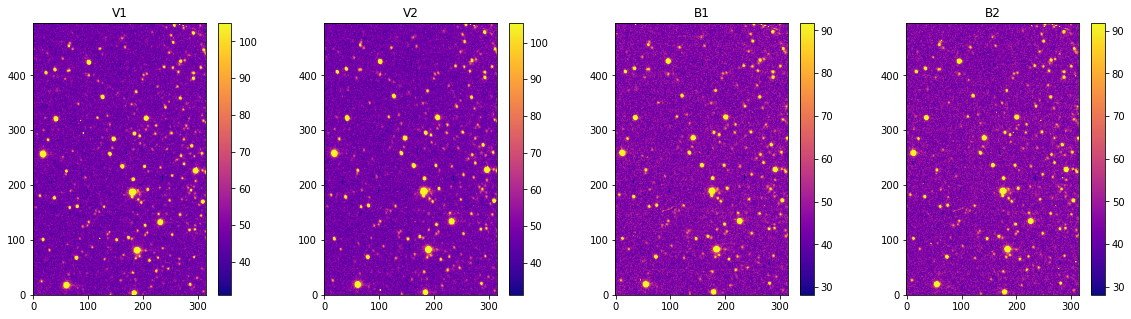

In [84]:
fig,ax = plt.subplots(ncols=4, figsize=(20,5))
for i in range(0,4):
    plt.sca(ax[i])
    quantile_imshow(imagenes_flat[i])
    plt.title(str(title_images[str(i+3)]))
    plt.colorbar()

## 6) Guardar las imágenes calibradas

Primero, copie los headers originales de las imágenes ciencia, y agregue un comentario describiendo **_muy brevemente_** el proceso de reducción realizado.

Para guardar sus resultados en formato fits, para cada imagen ciencia calibrada, use la función `fits.PrimaryHDU`. 
Use los headers que contienen su comentario.

Una vez obtenido el objeto `PrimaryHDU`, use el método `hdu.writeto`. Ponga un nombre descriptivo, pero corto, a las imágenes resultantes.

In [103]:
#Imagen V1
#No se puede escribir con tildes porque Python no las reconoce
header_v1 = headers[3]
comment = 'El proceso de reduccion consistio en determinar la region del overscan y quitarsela a la imagen, luego quitar el bias para eliminar los errores de fabricacion y finalmente, normalizar los flats y aplicarlos para que los pixeles den los mismos valores al exponerlos a la misma luz.'
header_v1['HISTORY'] = comment
v_1= fits.PrimaryHDU(V1, header_v1)
v_1.writeto("M92 V1 calibrado con bias y flat")

In [104]:
#Imagen V2
header_v2 = headers[4]
header_v2["HISTORY"] = comment
v_2= fits.PrimaryHDU(V2, header_v2)
v_2.writeto("M92 V2 calibrado con bias y flat")

In [106]:
#Imagen B1
header_b1 = headers[5]
header_b1["HISTORY"] = comment
b_1= fits.PrimaryHDU(B1, header_b1)
b_1.writeto("M92 B1 calibrado con bias y flat")

In [107]:
#Imagen B2
header_b2 = headers[6]
header_b2["HISTORY"] = comment
b_2= fits.PrimaryHDU(B2, header_b2)
b_2.writeto("M92 B2 calibrado con bias y flat")

### 6.extra) 

Cree un subplot con las imágenes ciencia calibradas, con barras de color indicando las cuentas.

# Alcyone, desde el observatorio uniandes

En la carpeta `data/uniandes` hay una imagen de Alcyone, en la región de las Pléyades, junto con sus imágenes de calibración: 9 bias, 0 darks, y 3 flats.

## 1) Main-flat, main-bias, main-dark

Obtenga de nuevo los tipos de las imágenes. Promedie todos los flats, todos los bias, y todos los darks, para obtener las imágenes "master", o "main".

### 1.extra)

Usando `astropy.modeling` [(documentación aquí)](https://docs.astropy.org/en/stable/modeling/index.html), realice un model 2D del main-bias. 

In [159]:
from astropy.modeling.models import custom_model
from astropy.modeling import fitting
fitter = fitting.LevMarLSQFitter()

Para guiarse en esto, grafique los primedios de los pixeles en X y en Y. ¿Qué función se le ocurre que se comporta así?

In [160]:
def bias_model(x,y,/,a=1,b=1,c=1,d=1):
    pass
    #return su modelo aquí
BiasModel = custom_model(bias_model)
bias_model = BiasModel()

Use el `fitter` para ajustar la imagen. Va a necesitar una grilla de pixeles como input al modelo. Yo recomiendo usar:

```python
X,Y = np.mgrid[:x_px_max,:y_px_max]
```

Donde `px_max` son la cantidad de pixeles en X y en Y.

Se recomienda analizar los residuales del modelo `main_bias - bias_model(X,Y)`; deberían ser Gaussianos y tener media cero, y su imagen debería ser plana.

¿Qué diferencia hay entre restar la imagen bias y restar el modelo, si este modelo es bueno?

## 2) Reducción

Ya que esta imagen no tiene overscan, no necesita ser recortada. Aplique directamente la calibración, incluyendo el main-dark.

Guarde la imagen calibrada en un .fits como en el ejercicio anterior.